In [5]:
import secretflow as sf
import numpy as np
sf.shutdown()
sf.init(['alice', 'bob', 'charlie'], address='local')
alice, bob, charlie = sf.PYU('alice'), sf.PYU('bob'), sf.PYU('charlie')

filepath = "/home/yejj/.secretflow/datasets/mnist.npz"
with np.load(filepath) as f:
    x_test, y_test = f['x_test'], f['y_test']
    y_train = f['y_train']

2024-01-19 10:29:14,855	INFO worker.py:1538 -- Started a local Ray instance.


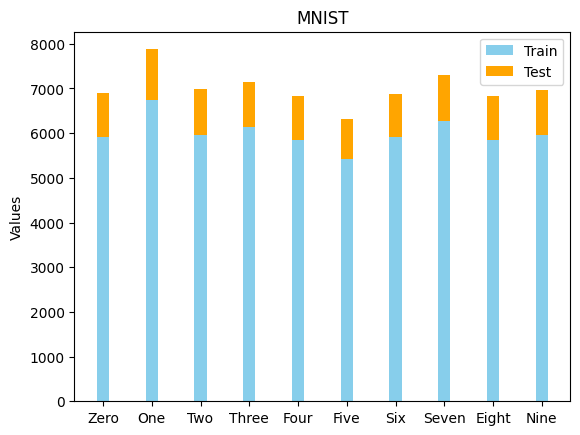

In [17]:
from matplotlib import pyplot as plt
from collections import defaultdict
""" 
# this part show data examples

figure = plt.figure(figsize=(10, 10))
j = 1

for i in range(10):
    temp = np.where(y_test == i)[0][:10]
    for k in range(10):
        plt.subplot(10, 10, j)
        plt.imshow(x_test[temp[k]], cmap='gray', aspect='equal')
        plt.axis('off')
        j += 1
plt.show()
"""
train_y_values = defaultdict(int)
test_y_values = defaultdict(int)
for v in y_train:
    train_y_values[v] += 1

for v in y_test:
    test_y_values[v] += 1
   
categories = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
values1 = [train_y_values[i] for i in range(10)]
values2 = [test_y_values[i] for i in range(10)]

# # 设置柱状图的宽度
bar_width = 0.25

plt.bar(categories, values1, width=bar_width, label='Train', color='skyblue')

plt.bar(categories, values2, width=bar_width, label='Test', color='orange', bottom=values1)

# 添加标题和标签
plt.title('MNIST')
# plt.xlabel('Categories')
plt.ylabel('Values')

plt.legend()
plt.show()

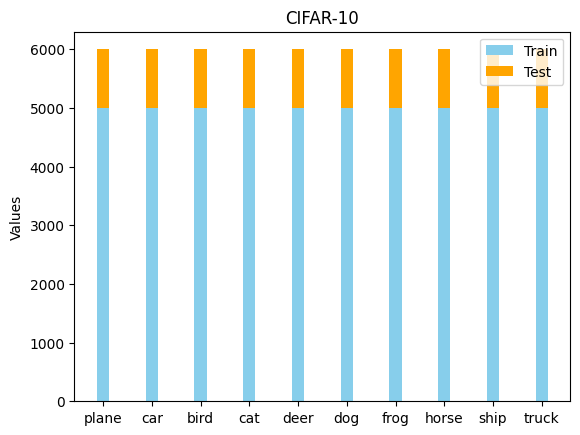

In [44]:
import pickle
import os

def get_cifar10_data_and_label(type='train', root="/home/yejj/tmp/cifar-10-batches-py"):
    def load_file(filename):
        with open(filename, 'rb') as fo:
            data = pickle.load(fo, encoding='latin1')
        return data

    if type == 'train':
        data_batch_1 = load_file(os.path.join(root, 'data_batch_1'))
        data_batch_2 = load_file(os.path.join(root, 'data_batch_2'))
        data_batch_3 = load_file(os.path.join(root, 'data_batch_3'))
        data_batch_4 = load_file(os.path.join(root, 'data_batch_4'))
        data_batch_5 = load_file(os.path.join(root, 'data_batch_5'))
        original_data = [data_batch_1, data_batch_2, data_batch_3, data_batch_4, data_batch_5]
    else:
        data_batch_1 = load_file(os.path.join(root, 'test_batch'))
        original_data = [data_batch_1]
    dataset = []
    labelset = []
    for data in original_data:
        img_data = (data["data"])
        img_label = (data["labels"])
        dataset.append(img_data)
        labelset.append(img_label)
    dataset = np.concatenate(dataset)
    labelset = np.concatenate(labelset)
    return dataset, labelset

def get_CIFAR10_dataset():
    train_dataset, label_dataset = get_cifar10_data_and_label()
    test_dataset, test_label_dataset = get_cifar10_data_and_label(type='test')
    return train_dataset, label_dataset, test_dataset, test_label_dataset

cifar_train_x, cifar_train_y, cifar_test_x, cifar_test_y = get_CIFAR10_dataset()

cifar_train_x = np.reshape(cifar_train_x, [len(cifar_train_x),3,32,32])
# cifar_train_x = np.reshape(cifar_train_x, [len(cifar_train_x),3,32,32])

classes=('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

tra_y = defaultdict(int)
tes_y = defaultdict(int)
for v in cifar_train_y:
    tra_y[v] += 1

for v in cifar_test_y:
    tes_y[v] += 1

values1 = [tra_y[i] for i in range(10)]
values2 = [tes_y[i] for i in range(10)]

bar_width = 0.25
plt.bar(classes, values1, width=bar_width, label='Train', color='skyblue')
plt.bar(classes, values2, width=bar_width, label='Test', color='orange', bottom=values1)

# 添加标题和标签
plt.title('CIFAR-10')
# plt.xlabel('Categories')
plt.ylabel('Values')

plt.legend()
plt.show()